[org-toggle-latex-overlays> ](org-toggle-latex-overlays> )[org-toggle-pretty-entities](org-toggle-pretty-entities)




# Multiple reactions




## Stoichiometry in multiple reactions



-   When we have multiple reactions, e.g.

-   A &rarr; 2B
-   B &rarr; C

-   We have a scenario where a species maybe consumed and/or generated by multiple reactions.

-   We can define a reaction extent &xi;\_j for each reaction.
-   Then for each species we can determine the change in moles from all the reactions as:

\begin{align}
n_i = n_{i0} + \sum_j \alpha_{ij}\xi_j
\end{align}

where $\alpha_{ij}$ is the stoichiometric coefficient of species $i$ in reaction $j$.

Consider &xi;\_1=0.5 and &xi;\_2=0.25, and an initial moles of species B of 0.75 moles.



In [1]:
N_B0 = 0.75
xi1 = 0.5
xi2 = 0.25

alpha_B1 = +2
alpha_B2 = -1

n_B = N_B0 + xi1 * alpha_B1 + xi2 * alpha_B2
print('There are now {} moles of B'.format(n_B))

There are now 1.5 moles of B


-   Does that make sense?

-   A slightly more compact way to write this using linear algebra.



In [2]:
import numpy as np
N_B0 = 0.75
xi = [0.5, 0.25]
alpha = [2, -1]

n_B = N_B0 + np.dot(xi, alpha)
print('There are now {} moles of B'.format(n_B))

There are now 1.5 moles of B



## Rates for multiple reactions



-   When we have multiple reactions, e.g.

-   A &rarr; 2B
-   B &rarr; C

we have a scenario where a species maybe consumed and/or generated by multiple reactions.

-   Each reaction will have its own reaction rate. We denote the rate of reaction $i$ as $r_i$.

-   In this example, we might have $r_1 = k_1 C_A$, and $r_2 = k_2 C_B$.

-   Then we have from reaction 1 that the rate of production of B is $r_{1,B} = 2 r_1$ and the rate of consumption in reaction two is $r_{2,B} = -r_2$.

-   The net rate of production of species B is the sum of these two species specific rates.

\begin{align}
r_B = 2 r_{1,B} + r_{2,b} \\
r_B = 2 r_1 - r_2
\end{align}

-   This is the expression we would use in a species mole balance. For example, in a constant volume batch reactor we would have:

\begin{align}
\frac{dN_B}{dt} = V r_B
\end{align}

In this example you also need another mole balance on species A.

-   Critical points
    -   We need rate laws for each reaction
    -   You derive the species rates using stoichiometry for each reaction
    -   You add all the species rates together to get the net rate of reaction for the species

-   Let us work out this example completely. Let us consider a constant volume batch reactor.



In [3]:
import numpy as np
from scipy.integrate import odeint

k1 = 0.09 # 1/min  assuming both are first order
k2 = 0.2  # 1/min  r2 = k2 * Cb

CA0 = 2.5 # mol/L

def batch(C, t):
    Ca, Cb = C
    r1 = k1 * Ca
    r2 = k2 * Cb

    ra = -r1
    r1b = 2 * r1
    r2b = -r2
    rb = r1b + r2b

    dCadt = ra
    dCbdt = rb

    return [dCadt, dCbdt]

init = [CA0, 0.0] # initial conditions
tspan = np.linspace(0, 30) # min
sol = odeint(batch, init, tspan)

import matplotlib.pyplot as plt
plt.plot(tspan, sol)
plt.xlabel('Time (min)')
plt.ylabel('Conc (mol/L)')
plt.legend(['A','B'])

plt.savefig('images/batch-multiple.png')

![img](./images/batch-multiple.png)

-   You can see here that A continuously disappears. A is only consumed in the first reaction.

-   Initially, B increases as it is produced by the first reaction. However, it begins to be consumed by reaction two, and eventually is completely consumed.
-   If B was the desired product, you could maximize the yield by stopping the reaction after a short time.




## Reversible chemical reactions



-   Reversible reactions are a special case of multiple reactions. We consider a forward and reverse reaction.

-   For example, in the water gas shift reaction we could write the forward reaction as:

\begin{align}
CO + H_2O \rightarrow H_2 + CO_2
\end{align}

and the reverse reaction as:

\begin{align}
H_2 + CO_2 \rightarrow CO + H_2O
\end{align}

We write this as $CO + H_2O \rightleftharpoons H_2 + CO_2$.

-   All reactions are to some extent reversible

\begin{align}
\alpha A + b B + \cdots \rightleftharpoons q Q + s S + \cdots
\end{align}

-   Thermodynamics defines the equilibrium distribution of reactants and products

\begin{align}
\frac{a_Q^q a_S^s}{a_A^{\alpha} a_B^b} = K_{eq} =  e^{-\Delta G / RT}
\end{align}

where $\Delta G$ is the reaction Gibbs free energy defined by $\Delta G = \sum_j \alpha_j G_j$

-   $a_A^{\alpha}$ is the activity of species $A$ raised to the &alpha; power. It is common to use concentration instead of activity, but you must remember this implies ideal activity, and that the equilibrium constant may end up having units.

-   Recall that activity is dimensionless

-   We sometimes express activity in terms of concentration using activity coefficients
    -   $a_j = \gamma_j C_j$
    -   For ideal solutions, &gamma;\_j = 1



K can use to check the direction of reaction


### A brief worked example.



-   The water gas shift reaction $H_2O + CO \rightleftharpoons CO_2 + H_2 $ has a Gibbs reaction energy of -730 cal/mol at 1000K.

-   If you start with equimolar amounts of water and carbon monoxide at a total pressure of 10 atm, what is the equilibrium composition of gases in mol/L?

-   There is no change in the number of moles for the reaction, the temperature is constant, and thus the volume is constant.

-   We essentially only need to find the equilibrium extent of reaction, and the problem is solved. We know in this case that $C_j = C_{j,0} + \alpha_j \xi$. At equilibrium,  we will have:

\begin{align}
K = \frac{C_{C,eq} C_{D,eq}}{C_{A,eq} C_{B,eq}} = \frac{(C_{C,0} + \alpha_C \xi_{eq}) (C_{D,0} + \alpha_D \xi_{eq}) }{(C_{A,0} + \alpha_A \xi_{eq}) (C_{B,0} + \alpha_B \xi_{eq})}
\end{align}

-   After simplification, we have:

\begin{align}
K = \frac{\xi_{eq}^2}{(C_{A,0} - \xi_{eq})^2}
\end{align}

-   So, we simply evaluate $K$ for the conditions, and then solve for $\xi_{eq}$.

-   Let $C_{A0}$ = the concentration of A and B initially in the reactor. $C_{A0} = P_{A0} / (RT)$.



In [4]:
import numpy as np

R = 1.987   # cal / mol / K
dG = -730   # cal / mol
T = 1000.0  # K

K = np.exp(-dG / R / T)
print('K = {0}'.format(K))

Pa0 = 5        # atm
R = 0.082057   # L atm / (mol K)
Ca0 = Pa0 / (R * T)

def func(xi):
    return K - (xi**2) / (Ca0 - xi)**2

from scipy.optimize import fsolve
guess = 0.05
xi_eq, = fsolve(func, guess)
print('xi_eq = ',xi_eq)

print('C_A = {0:1.4f} mol / L'.format(Ca0 - xi_eq))
print('C_C = {0:1.4f} mol / L'.format(xi_eq))

K = 1.4439580981442106
xi_eq =  0.0332570531518
C_A = 0.0277 mol / L
C_C = 0.0333 mol / L


-   An alternative formulation that uses the linear algebra notation follows. The advantage of this approach is that we do not need to derive the equation to solve, it is simply the definition of the equilibrium constant.  The code, on the other hand, is a little more verbose, while simultaneously being more explicit.



In [5]:
import numpy as np

R = 1.987   # cal / mol / K
dG = -730   # cal / mol
T = 1000.0  # K

K = np.exp(-dG / R / T)
print('K = {0}'.format(K))

Pa0 = 5         # atm
R = 0.082057    # L atm / (mol K)
Ca0 = Pa0 / (R * T)

def func(xi):
    nu = np.array([-1, -1, 1, 1])  # stoichiometric coefficients
    C0 = np.array([Ca0, Ca0, 0.0, 0.0])  # initial concentrations
    # we use arrays so we can have element-wise multiplication
    C = C0 + nu * xi
    return K - np.prod(C**nu)

from scipy.optimize import fsolve
guess = 0.05
xi_eq, = fsolve(func, guess)

print('C_A = {0:1.4f} mol / L'.format(Ca0 - xi_eq))
print('C_C = {0:1.4f} mol / L'.format(xi_eq))

K = 1.4439580981442106
C_A = 0.0277 mol / L
C_C = 0.0333 mol / L


-   We get the same result as before.




### Equilibria with multiple reactions



-   We use the same fundamental approaches to solving equilibrium problems when there are multiple reactions
    -   In fact, we do not need to consider reactions at all if we know the Gibbs free energies of each species

-   Let us consider this set of reactions, where all species are in the gas phase. Assume we start with equimolar amounts of A and B, and a total pressure of 2.5 atm at 400 K.

-   $A + B \rightleftharpoons C$ with K\_1 = 108
-   $A + B \rightleftharpoons D $ with K\_2 = 284

We want to know what the equilibrium composition for these reactions are.

We have two equations:
\begin{align}
K_1 = \frac{a_C}{a_A a_B}
\end{align}
and
\begin{align}
K_2 = \frac{a_D}{a_A a_B}
\end{align}
-   We know the activity of a gas species is $a_j = P_j / 1 atm$ or equivalently in mole fraction: $a_j = x_j P / 1 atm$.

-   We define reaction extents for each reaction: &xi;\_1 and &xi;\_2

-   Then:

\begin{align}
n_A = n_{A0} - \xi_1 - \xi_2 \\
n_B = n_{B0} - \xi_1 - \xi_2 \\
n_C = \xi_1  \\
n_D = \xi_2 \\
n_{total} = n_{t0} - \xi_1 - \xi_2
\end{align}

-   We can define mole fractions from these equations which allow us to express the equilibrium equations in two unknowns.

-   It is convenient to normalize all equations by $n_{t0}$, which leads to these definitions for the mole fractions:

\begin{align}
y_A = \frac{y_{A0} - \xi_1' - \xi_2'}{1 - \xi_1' - \xi_2'} \\
y_B = \frac{y_{B0} - \xi_1' - \xi_2'}{1 - \xi_1' - \xi_2'} \\
y_C = \frac{\xi_1'}{1 - \xi_1' - \xi_2'} \\
y_D = \frac{\xi_2'}{1 - \xi_1' - \xi_2'} \\
\end{align}

-   These are plugged into the activity $a_j = y_j P / 1 atm$.

Here is the code we use to solve this problem.



In [6]:
ya0 = 0.5  # initial mole fraction of A
yb0 = 0.5  # initial mole fraction of B
P = 2.5    # initial pressure in atm

def xj(extent):
    'convenience function to calculate mole fractions'
    ext1, ext2 = extent
    ya = (ya0 - ext1 - ext2) / (1.0 - ext1 - ext2)
    yb = (yb0 - ext1 - ext2) / (1.0 - ext1 - ext2)
    yc = (ext1) / (1.0 - ext1 - ext2)
    yd = (ext2) / (1.0 - ext1 - ext2)
    return [ya, yb, yc, yd]

def func(extent):
    'zeros function for fsolve'
    ya, yb, yc, yd = xj(extent)

    eq1 = 108.0 - (yc * P)/(ya * P * yb * P)
    eq2 = 284.0 - (yd * P)/(ya * P * yb * P)

    return [eq1, eq2]

from scipy.optimize import fsolve

guess = [0.1, 0.39]
sol = fsolve(func, guess)

print('The reaction extents are:\n',sol)

print('The mole fractions are: \n',xj(sol))

The reaction extents are:
 [ 0.13335692  0.35067931]
The mole fractions are: 
 [0.030939713798347378, 0.030939713798347378, 0.25846179039432998, 0.67965878200897523]


-   There are significant amounts of each product

-   Note that other initial guesses give unphysical solutions, i.e. negative mole fractions.

-   Also note that this solution applies to a *constant total pressure* which means in this case the volume must be changing since there is a change in the number of moles
    -   You would get a different result in a constant volume reactor where the total pressure changes

-   There is a constraint on the two reaction extents.
    -   since no mole fraction can be negative, $\xi_1' + \xi_2' \le y_{A0}$
    -   Other solutions violate this constraint
    -   You may have to use constrained optimization to find physical solutions




### Temperature dependent equilibrium constants



-   We defined the equilibrium constant as $K = e^{-\Delta G /(RT)}$.

-   Thus, the equilibrium constant is temperature dependent because of the $T$ in the denominator of the exponential.

-   It is *also* temperature dependent because $\Delta G$ is temperature dependent.

-   To incorporate the temperature dependence of the Gibbs free energy of a reaction, we need to compute the temperature dependence.

-   The [NIST Webbook](http://webbook.nist.gov/chemistry/) provides data about a large number of compounds which can be used to compute reaction energies.

-   Let us consider CO.

-   At [http://webbook.nist.gov/cgi/cbook.cgi?ID=C630080&Units=SI&Mask=1#Thermo-Gas>](http://webbook.nist.gov/cgi/cbook.cgi?ID=C630080&Units=SI&Mask=1#Thermo-Gas>)you will find the data needed to compute the Gibbs free energy of CO at arbitrary temperature and standard pressure.
    -   You will find the standard heat of formation and entropy,
    -   coefficients of the Shomate polynomials which are used to calculate the enthalpy and entropy at non-standard temperatures.

-   The Shomate polynomials are polynomials in $t = T/1000$.

\begin{align}
H = H_{F, 298.15} + A t + B t^2/2 + C t^3/3 + D t^4/4 - E/t + F - H \\
S = A \ln(t) + B t + C t^2/2 + D t^3/3 - E/(2 t^2) + G
\end{align}

-   With this information, we can calculate $G$ for CO at any temperature: $ G = H - T S $. If we have this information for all of the species, then we can compute the reaction energy at any temperature.

$ G_{rxn}(T) = \vec{\alpha} \cdot \vec{G_J}(T) $



In [1]:
import numpy as np

R = 8.314e-3  # kJ/mol/K

P = 10.0  # atm, this is the total pressure in the reactor
Po = 1.0  # atm, this is the standard state pressure

species = ['CO', 'H2O', 'CO2', 'H2']

# Heats of formation at 298.15 K

Hf298 = [-110.53,   # CO
         -241.826,  # H2O
         -393.51,   # CO2
            0.0]    # H2

# Shomate parameters for each species in each column
# we write it this way to take less horizontal space
#      CO          H2O        CO2        H2
WB = [[25.56759,   30.092,    24.99735,  33.066178],     # A
      [6.09613,    6.832514,  55.18696, -11.363417],     # B
      [4.054656,   6.793435, -33.69137,  11.432816],     # C
      [-2.671301, -2.53448,   7.948387, -2.772874],      # D
      [0.131021,   0.082139, -0.136638, -0.158558],      # E
      [-118.0089, -250.881,  -403.6075, -9.980797],      # F
      [227.3665,   223.3967,  228.2431,  172.707974],    # G
      [-110.5271, -241.8264, -393.5224,  0.0]]           # H

# transpose the array so it has the right dimensions
WB = np.array(WB).T

def G_rxn(T):
    # Shomate equations
    t = T/1000
    T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0,
                    t**4 / 4.0, -1.0 / t, 1.0, 0.0, -1.0])
    T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                    -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

    H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
    S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

    Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K

    nu = np.array([-1, -1, 1, 1])
    Grxn = np.dot(nu, Gjo)
    return Grxn

print('Reaction energy at 1000K = {0} kJ/mol'.format(G_rxn(1000)))

# print energy in different units
import quantities as u

e500 =  (G_rxn(500.0) * 1000 * u.J / u.mol ).rescale(u.cal / u.mol)
e1000 = (G_rxn(1000.0) * 1000 * u.J / u.mol ).rescale(u.cal / u.mol)

print('At 1000 K the reaction energy is {0}'.format(e1000))
print('At 500 K the reaction energy is {0}'.format(e500))

Reaction energy at 1000K = -3.0080381666666653 kJ/mol
At 1000 K the reaction energy is -718.9383763543655 cal/mol
At 500 K the reaction energy is -4890.0997658412025 cal/mol


In [2]:
Gjo

NameError: name 'Gjo' is not defined

-   You can see here that lower temperatures make the reaction much more exothermic.
-   The equilibrium constant would be considerably larger, and the products more favored at the lower temperature.




### Another view of chemical equilibrium



-   The composition at chemical equilibrium is the one that minimizes the Gibbs free energy of the mixture.

-   We can use the data for computing the Gibbs free energy of pure components to illustrate this.

-   We have to compute the Gibbs free energy of a species in the mixture, which is easy if we can assume an ideal mixture. Then we have

\begin{align}
G_j =  G_{j0} + R T \log(x_j  P / P_0)
\end{align}

-   Here we will show that there is a reaction extent that minimizes the Gibbs free energy of the mixture.



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2810: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


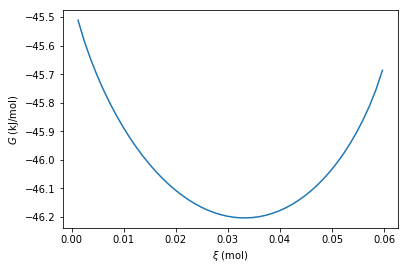

In [3]:
import numpy as np
T = 1000       # K
R = 8.314e-3   # kJ/mol/K
R_ = 0.082057  # L * atm / mol / K

P = 10.0  # atm, this is the total pressure in the reactor
Po = 1.0  # atm, this is the standard state pressure

species = ['CO', 'H2O', 'CO2', 'H2']
nu = np.array([-1, -1, 1, 1])  # stoichiometric coefficients

# Heats of formation at 298.15 K
Hf298 = [
    -110.53,   # CO
    -241.826,  # H2O
    -393.51,   # CO2
       0.0]    # H2

# Shomate parameters for each species
#      CO        H2O     CO2       H2
WB = [[25.56759, 30.092, 24.99735, 33.066178],      # A
      [6.09613, 6.832514, 55.18696, -11.363417],    # B
      [4.054656, 6.793435, -33.69137, 11.432816],   # C
      [-2.671301, -2.53448, 7.948387, -2.772874],   # D
      [0.131021, 0.082139, -0.136638, -0.158558],   # E
      [-118.0089, -250.881, -403.6075, -9.980797],  # F
      [227.3665, 223.3967, 228.2431, 172.707974],   # G
      [-110.5271, -241.8264, -393.5224, 0.0]]       # H

WB = np.array(WB).T

# Shomate equations
t = T / 1000
T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0, t**4 / 4.0,
                -1.0 / t, 1.0, 0.0, -1.0])
T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K

C0 = np.array([5.0, 5.0, 0.0, 0.0]) / R_ / T  # initial concentrations

@np.vectorize
def G_tot(xi):

    C = C0 + xi * nu  # change in moles from reaction extent

    x = C / C.sum()   # mole fractions

    # Species gibbs energies in mixture
    G = Gjo + R * T * np.log(x * P / Po)
    return  np.dot(C, G)


XI = np.linspace(0, max(C0))

import matplotlib.pyplot as plt
plt.plot(XI, G_tot(XI))
plt.xlabel('$\\xi$ (mol)')
plt.ylabel('$G$ (kJ/mol)')
plt.savefig('images/equilibrium-G.png')
plt.show()

![img](./images/equilibrium-G.png)

You have to be careful not to exceed the maximum &xi;. You can see there is a minimum in the Gibbs energy of the mixture, and it corresponds to the value we saw previously.

We could find the minimum numerically using optimization algorithms. For completeness we show that here. see [scipy.optimize.fmin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)



In [9]:
import numpy as np
T = 1000       # K
R = 8.314e-3   # kJ/mol/K
R_ = 0.082057  # L * atm / mol / K

P = 10.0  # atm, this is the total pressure in the reactor
Po = 1.0  # atm, this is the standard state pressure

species = ['CO', 'H2O', 'CO2', 'H2']
nu = np.array([-1, -1, 1, 1])  # stoichiometric coefficients

# Heats of formation at 298.15 K
Hf298 = [
    -110.53,   # CO
    -241.826,  # H2O
    -393.51,   # CO2
       0.0]    # H2

# Shomate parameters for each species
#      CO        H2O     CO2       H2
WB = [[25.56759, 30.092, 24.99735, 33.066178],      # A
      [6.09613, 6.832514, 55.18696, -11.363417],    # B
      [4.054656, 6.793435, -33.69137, 11.432816],   # C
      [-2.671301, -2.53448, 7.948387, -2.772874],   # D
      [0.131021, 0.082139, -0.136638, -0.158558],   # E
      [-118.0089, -250.881, -403.6075, -9.980797],  # F
      [227.3665, 223.3967, 228.2431, 172.707974],   # G
      [-110.5271, -241.8264, -393.5224, 0.0]]       # H

WB = np.array(WB).T

# Shomate equations
t = T/1000
T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0,
                t**4 / 4.0, -1.0 / t, 1.0, 0.0, -1.0])
T_S = np.array([np.log(t), t,  t**2 / 2.0,
                t**3 / 3.0, -1.0 / (2.0 * t**2),
                0.0, 1.0, 0.0])

H = np.dot(WB, T_H)           # (H - H_298.15) kJ/mol
S = np.dot(WB, T_S / 1000.0)  # absolute entropy kJ/mol/K

Gjo = Hf298 + H - T * S       # Gibbs energy of each component at 1000 K

C0 = np.array([5.0, 5.0, 0.0, 0.0]) / R_ / T # initial concentrations

@np.vectorize
def G_tot(xi):

    C = C0 + xi * nu  # change in moles from reaction extent

    x = C / C.sum()   # mole fractions

    # Species gibbs energies in mixture
    G = Gjo + R * T * np.log(x * P / Po)
    return  np.dot(C, G)

from scipy.optimize import fmin

xi_guess = 0.03
sol, = fmin(G_tot, xi_guess)
print('The Gibbs free energy is minimized at xi = {0} mol/L'.format(sol))

Optimization terminated successfully.
         Current function value: -46.204283
         Iterations: 6
         Function evaluations: 12
The Gibbs free energy is minimized at xi = 0.0331875 mol/L



### Gibbs energy constrained minimization and the NIST webbook



-   We used the NIST webbook to compute a temperature dependent Gibbs energy of reaction, and then used a reaction extent variable to compute the equilibrium concentrations of each species for the water gas shift reaction.

-   Here we look at the direct minimization of the Gibbs free energy of the species, with no assumptions about stoichiometry of reactions. We only apply the constraint of conservation of atoms. We use the NIST Webbook to provide the data for the Gibbs energy of each species.

-   As a reminder we consider equilibrium between the species $CO$, $H_2O$, $CO_2$ and $H_2$, at 1000K, and 10 atm total pressure with an initial equimolar molar flow rate of $CO$ and $H_2O$.



In [10]:
import numpy as np

T = 1000  # K
R = 8.314e-3  # kJ/mol/K

P = 10.0  # atm, this is the total pressure in the reactor
Po = 1.0  # atm, this is the standard state pressure

We are going to store all the data and calculations in vectors, so we need to assign each position in the vector to a species. Here are the definitions we use in this work.

    1  CO
    2  H2O
    3  CO2
    4  H2



In [11]:
species = ['CO', 'H2O', 'CO2', 'H2']

# Heats of formation at 298.15 K

Hf298 = [
    -110.53,   # CO
    -241.826,  # H2O
    -393.51,   # CO2
       0.0]    # H2


# Shomate parameters for each species
#      CO        H2O     CO2       H2
WB = [[25.56759, 30.092, 24.99735, 33.066178],      # A
      [6.09613, 6.832514, 55.18696, -11.363417],    # B
      [4.054656, 6.793435, -33.69137, 11.432816],   # C
      [-2.671301, -2.53448, 7.948387, -2.772874],   # D
      [0.131021, 0.082139, -0.136638, -0.158558],   # E
      [-118.0089, -250.881, -403.6075, -9.980797],  # F
      [227.3665, 223.3967, 228.2431, 172.707974],   # G
      [-110.5271, -241.8264, -393.5224, 0.0]]       # H

WB = np.array(WB).T

# Shomate equations
t = T/1000
T_H = np.array([t,  t**2 / 2.0, t**3 / 3.0, t**4 / 4.0,
                -1.0 / t, 1.0, 0.0, -1.0])
T_S = np.array([np.log(t), t,  t**2 / 2.0,  t**3 / 3.0,
                -1.0 / (2.0 * t**2), 0.0, 1.0, 0.0])

H = np.dot(WB, T_H)          # (H - H_298.15) kJ/mol
S = np.dot(WB, T_S/1000.0)   # absolute entropy kJ/mol/K

Gjo = Hf298 + H - T*S        # Gibbs energy of each component at 1000 K

-   Now, construct the Gibbs free energy function, accounting for the change in activity due to concentration changes (ideal mixing).



In [12]:
def func(nj):
    nj = np.array(nj)
    Enj = np.sum(nj)
    Gj =  Gjo / (R * T) + np.log(nj / Enj * P / Po)
    return np.dot(nj, Gj)

-   We impose the constraint that all atoms are conserved from the initial conditions to the equilibrium distribution of species. These constraints are in the form of $A_{eq} n = b_{eq}$, where $n$ is the vector of mole numbers for each species.



In [13]:
Aeq = np.array([[ 1,    0,    1,    0],   # C balance
                [ 1,    1,    2,    0],   # O balance
                [ 0,    2,    0,    2]])  # H balance

# equimolar feed of 1 mol H2O and 1 mol CO
beq = np.array([1,   # mol C fed
                2,   # mol O fed
                2])  # mol H fed

def ec1(nj):
    'conservation of atoms constraint'
    return np.dot(Aeq, nj) - beq

-   Now we are ready to solve the problem.



In [18]:
from scipy.optimize import fmin_slsqp

n0 = [0.5, 0.5, 0.5, 0.5]  # initial guesses
N = fmin_slsqp(func, n0, f_eqcons=ec1)
print(N)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -91.20483230797026
            Iterations: 2
            Function evaluations: 13
            Gradient evaluations: 2
[ 0.45502309  0.45502309  0.54497691  0.54497691]


1.  Compute mole fractions and partial pressures



-   The pressures here are in good agreement with the pressures found by other methods. The minor disagreement (in the third or fourth decimal place) is likely due to convergence tolerances in the different algorithms used.



In [15]:
yj = N / np.sum(N)
Pj = yj * P

for s, y, p in zip(species, yj, Pj):
    print('{0:10s}: {1:1.2f} {2:1.2f}'.format(s, y, p))

CO        : 0.21 2.09
H2O       : 0.29 2.89
CO2       : 0.41 4.06
H2        : 0.10 0.96


1.  Computing equilibrium constants



-   We can compute the equilibrium constant for the reaction $CO + H_2O \rightleftharpoons CO_2 + H_2$.

-   Compared to the value of K = 1.44 we found previously, the agreement is excellent.

-   Note, that to define an equilibrium constant it is necessary to specify a reaction, even though it is not necessary to even consider a reaction to obtain the equilibrium distribution of species!



In [16]:
nuj = np.array([-1, -1, 1, 1])  # stoichiometric coefficients of the reaction
K = np.prod(yj**nuj)
print(K)

0.646988502874
